In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

df=pd.read_csv('FordA.csv',index_col=0)

In [3]:
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,...,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500,Target
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/01/2025 00:00,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,1.552290,1.437952,1.279354,1.069119,0.744547,0.277605,-0.300724,-0.937328,-1.520083,-1.951617,-2.136033,-2.040136,-1.722941,-1.261900,-0.804548,-0.461534,-0.278225,-0.251300,-0.301830,-0.313264,-0.204458,0.067002,0.471611,0.932651,1.353120,1.644498,1.758836,1.696134,1.482211,1.179769,...,1.290419,1.135509,0.840443,0.453170,0.031299,-0.366744,-0.704964,-0.963146,-1.166004,-1.320913,-1.457381,-1.571719,-1.623356,-1.571719,-1.402057,-1.099614,-0.708652,-0.287077,0.103517,0.438416,0.689222,0.895768,1.113379,1.342055,1.570731,1.762524,1.839979,1.744082,1.489588,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1
01/01/2025 00:01,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,-1.545709,-1.367893,-1.119998,-0.828548,-0.506228,-0.162588,0.185410,0.523795,0.822743,1.062119,1.212658,1.241355,1.155590,0.978726,0.751291,0.518479,0.326827,0.207952,0.170809,0.188096,0.237036,0.285012,0.296589,0.250279,0.131545,-0.054224,-0.281435,-0.524193,-0.764913,-0.968670,...,0.926682,0.966194,0.965209,0.925171,0.851871,0.750836,0.635263,0.495169,0.327521,0.132563,-0.093737,-0.351475,-0.623371,-0.886077,-1.117509,-1.288357,-1.369218,-1.323061,-1.150471,-0.861634,-0.479214,-0.034418,0.409945,0.795128,1.071377,1.210040,1.189128,1.016435,0.727256,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
01/01/2025 00:02,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,-2.409010,-2.179321,-1.883556,-1.543741,-1.178754,-0.816914,-0.464514,-0.121238,0.202845,0.510881,0.787767,1.030043,1.218829,1.350979,1.410761,1.401322,1.328954,1.212536,1.074093,0.954528,0.869575,0.825525,0.825525,0.838110,0.819232,0.753157,0.617860,0.435367,0.237456,0.059242,...,0.797207,0.938796,1.020603,0.989139,0.834964,0.567517,0.245951,-0.076558,-0.341803,-0.521149,-0.624982,-0.681618,-0.725668,-0.779157,-0.845232,-0.895575,-0.892429,-0.823207,-0.681618,-0.483392,-0.257478,-0.040374,0.134882,0.226129,0.254761,0.259481,0.260740,0.281821,0.332164,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1
01/01/2025 00:03,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,-1.246560,-0.852660,-0.358617,0.165802,0.659512,1.073440,1.363857,1.524087,1.564144,1.504058,1.353842,1.120173,0.816404,0.482591,0.138764,-0.184367,-0.458761,-0.642358,-0.735826,-0.745840,-0.719135,-0.679078,-0.645696,-0.622330,-0.572258,-0.475452,-0.328574,-0.138635,0.043794,0.172145,...,-0.538876,-0.805927,-1.036258,-1.199826,-1.289955,-1.276603,-1.153092,-0.929437,-0.605639,-0.218750,0.165802,0.515972,0.796375,0.989986,1.106821,1.156893,1.170245,1.160231,1.123511,1.056749,0.929900,0.729612,0.442533,0.101043,-0.245455,-0.558905,-0.795912,-0.926099,-0.962819,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1
01/01/2025 00:04,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,1.250755,1.056614,0.888359,0.684510,0.339371,-0.201420,-0.888032,-1.607432,-2.200641,-2.481067,-2.351639,-1.823144,-0.986181,-0.005014,0.905615,1.466467,1.585109,1.261541,0.624111,-0.190634,-0.951667,-1.434862,-1.510361,-1.143651,-0.449057,0.395456,1.175256,1.682179,1.790036,1.498824,...,-0.110605,-0.266781,-0.303452,-0.158709,0.112873,0.469877,0

In [4]:
df.describe()


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,...,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500,Target
count,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,...,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,0.002795,0.002214,0.000475,-0.002284,-0.005296,-0.007560,-0.008860,-0.008591,-0.006415,-0.003409,0.000167,0.003652,0.006249,0.007954,0.008731,0.009054,0.009379,0.010103,0.011084,0.011859,0.011909,0.010725,0.007701,0.002825,-0.003545,-0.010353,-0.016520,-0.020915,-0.022624,-0.021409,-0.017765,-0.012790,-0.007927,-0.003818,-0.000542,0.001852,0.003701,0.006158,0.009484,0.013585,...,0.023601,0.021234,0.014599,0.005517,-0.003988,-0.012341,-0.017811,-0.020034,-0.019386,-0.016733,-0.013050,-0.009138,-0.005319,-0.001672,0.001832,0.005521,0.009200,0.012550,0.014918,0.015462,0.014272,0.011437,0.007624,0.003957,0.001311,0.000067,-0.000064,0.000372,0.000788,0.000666,-0.000474,-0.002671,-0.005393,-0.007862,-0.009072,-0.008612,-0.006481,-0.003439,-0.000193,-0.027027
std,1.051407,1.045719,1.041244,1.041158,1.045267,1.049613,1.051191,1.049814,1.045690,1.038772,1.029645,1.022150,1.021942,1.031305,1.045079,1.055547,1.057857,1.052957,1.044653,1.036006,1.028759,1.024042,1.023167,1.026426,1.031362,1.035173,1.036409,1.034466,1.030472,1.025108,1.019572,1.014711,1.010704,1.008321,1.008718,1.012021,1.017178,1.022341,1.025748,1.027126,...,1.011793,1.014892,1.014588,1.012030,1.007960,1.002640,0.996858,0.992367,0.990363,0.989764,0.990275,0.992599,0.997196,1.003316,1.009013,1.013954,1.019176,1.024704,1.027173,1.022964,1.012112,1.000013,0.994744,0.999833,1.011240,1.022256,1.027967,1.028274,1.026749,1.027131,1.029573,1.031002,1.028345,1.021179,1.012559,1.007563,1.010660,1.020971,1.032794,0.999736
min,-3.933454,-3.656912,-3.479467,-3.595350,-3.773891,-3.914729,-3.855301,-4.497360,-4.552591,-4.000282,-4.167363,-4.089763,-3.643527,-3.809497,-3.878669,-3.806707,-4.020803,-3.861801,-3.717866,-3.444758,-3.817300,-3.819272,-3.416308,-3.656892,-4.031496,-4.011296,-3.802828,-3.923788,-4.493159,-4.617693,-4.306665,-3.806682,-3.813283,-3.520799,-3.271331,-3.478838,-3.674570,-4.180695,-4.444739,-4.390120,...,-3.330722,-3.957914,-4.271510,-4.158267,-3.740493,-3.486802,-3.234698,-3.396501,-3.384421,-3.752627,-3.962461,-3.716134,-3.764158,-3.573786,-3.989691,-4.182075,-4.021755,-3.730736,-3.882138,-3.703993,-3.393170,-3.301967,-3.685759,-3.875249,-3.812085,-3.584812,-3.673399,-4.190544,-4.449116,-4.402103,-4.073011,-4.014450,-3.817036,-3.640661,-3.746353,-3.680805,-3.904569,-4.221550,-4.339612,-1.000000
25%,-0.666519,-0.680918,-0.680504,-0.708617,-0.702586,-0.695826,-0.691354,-0.710094,-0.692190,-0.692197,-0.677508,-0.677496,-0.661689,-0.672309,-0.688792,-0.675161,-0.670045,-0.678288,-0.682577,-0.666284,-0.669245,-0.661137,-0.668673,-0.694711,-0.702810,-0.702765,-0.712561,-0.711542,-0.712349,-0.699328,-0.696371,-0.677105,-0.688886,-0.687233,-0.681386,-0.694638,-0.6

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 01/01/2025 00:00 to 04/01/2025 10:00
Columns: 501 entries, C1 to Target
dtypes: float64(500), int64(1)
memory usage: 18.8+ MB


In [6]:
df.shape

(4921, 501)

In [7]:
df[df['Target']==1].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,...,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500,Target
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/01/2025 00:01,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,-1.545709,-1.367893,-1.119998,-0.828548,-0.506228,-0.162588,0.185410,0.523795,0.822743,1.062119,1.212658,1.241355,1.155590,0.978726,0.751291,0.518479,0.326827,0.207952,0.170809,0.188096,0.237036,0.285012,0.296589,0.250279,0.131545,-0.054224,-0.281435,-0.524193,-0.764913,-0.968670,...,0.926682,0.966194,0.965209,0.925171,0.851871,0.750836,0.635263,0.495169,0.327521,0.132563,-0.093737,-0.351475,-0.623371,-0.886077,-1.117509,-1.288357,-1.369218,-1.323061,-1.150471,-0.861634,-0.479214,-0.034418,0.409945,0.795128,1.071377,1.210040,1.189128,1.016435,0.727256,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
01/01/2025 00:05,-0.540897,-1.014020,-1.298226,-1.320825,-1.082248,-0.637124,-0.090375,0.462991,0.923214,1.218635,1.307273,1.191861,0.892437,0.446956,-0.108585,-0.724568,-1.325420,-1.824392,-2.153300,-2.244789,-2.058358,-1.601285,-0.919017,-0.096378,0.762638,1.545988,2.154530,2.524624,2.629981,2.466569,2.049444,1.441970,0.709582,-0.069831,-0.821833,-1.465579,-1.924294,-2.151737,-2.135578,-1.893731,...,-1.421018,-1.350124,-1.153145,-0.915531,-0.706053,-0.571093,-0.518091,-0.498039,-0.445527,-0.271428,0.080722,0.602466,1.223557,1.823117,2.275526,2.474446,2.352414,1.917677,1.240379,0.430574,-0.387616,-1.111499,-1.677979,-2.059563,-2.272728,-2.311233,-2.172543,-1.864899,-1.377703,-0.731021,0.019686,0.790333,1.463596,1.942736,2.129041,1.986347,1.542409,0.909187,0.206006,1
01/01/2025 00:06,-0.334060,-1.008014,-1.554353,-1.922185,-2.085926,-2.042102,-1.814500,-1.449649,-1.008381,-0.531562,-0.053601,0.393866,0.779954,1.078232,1.264621,1.312305,1.209263,0.974747,0.664178,0.336353,0.056177,-0.134728,-0.218396,-0.203558,-0.154808,-0.153361,-0.228709,-0.386006,-0.585456,-0.784771,-0.906830,-0.895031,-0.717968,-0.398591,0.010634,0.432527,0.802337,1.060005,1.154129,1.066744,...,-1.977918,-1.818610,-1.471211,-1.019489,-0.556570,-0.142324,0.197732,0.473878,0.703978,0.881875,1.012959,1.065041,1.019820,0.854301,0.566227,0.206567,-0.157179,-0.453113,-0.607918,-0.614909,-0.501862,-0.316585,-0.132658,-0.010586,0.013589,-0.049253,-0.144841,-0.219832,-0.207521,-0.068962,0.183345,0.521307,0.879190,1.179716,1.362337,1.379528,1.211172,0.860810,0.359388,1
01/01/2025 00:07,1.045890,0.611195,0.153108,-0.279675,-0.651621,-0.922651,-1.083900,-1.131134,-1.084075,-0.964211,-0.808925,-0.655508,-0.529790,-0.441837,-0.389042,-0.354104,-0.316158,-0.247077,-0.131744,0.045589,0.281611,0.556832,0.823233,1.038673,1.162654,1.167588,1.048244,0.820997,0.517787,0.177809,-0.157492,-0.461967,-0.717077,-0.900996,-1.001552,-1.010097,-0.930869,-0.761175,-0.517578,-0.226844,...,-0.296369,-0.397430,-0.529182,-0.652091,-0.715442,-0.661860,-0.458831,-0.111829,0.335718,0.816923,1.255353,1.582019,1.758760,1.758254,1.587979,1.280815,0.873281,0.388261,-0.145638,-0.703638,-1.253647,-1.734274,-2.082531,-2.234811,-2.150979,-1.824210,-1.279789,-0.596230,0.130394,0.797700,1.328339,1.663845,1.802068,1.765138,1.592741,1.329302,1.013114,0.674495,0.337014,1
01/01/2025 00:08,0.825565,0.385282,-0.062416,-0.480982,-0.831189,-1.081840,-1.213596,-1.231525,-1.141304,-0.964399,-0.738466,-0.514829,-0.341906,-0.248976,-0.240375,-0.283038,-0.331154,-0.339549,-0.272307,-0.107165,0.150828,0.468128,0.794665,1.082448,1.266884,1.317687,1.227088,1.004154,0.670701,0.278906,-0.118033,-0.469113,-0.730211,-0.881946,-0.920763,-0.878022,-0.795513,-0.710231,-0.654705,-0.639421,...,-0.081046,0.231007,0.541672,0.824235,1

In [8]:
df[df['Target']==-1].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,...,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500,Target
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/01/2025 00:00,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,1.552290,1.437952,1.279354,1.069119,0.744547,0.277605,-0.300724,-0.937328,-1.520083,-1.951617,-2.136033,-2.040136,-1.722941,-1.261900,-0.804548,-0.461534,-0.278225,-0.251300,-0.301830,-0.313264,-0.204458,0.067002,0.471611,0.932651,1.353120,1.644498,1.758836,1.696134,1.482211,1.179769,...,1.290419,1.135509,0.840443,0.453170,0.031299,-0.366744,-0.704964,-0.963146,-1.166004,-1.320913,-1.457381,-1.571719,-1.623356,-1.571719,-1.402057,-1.099614,-0.708652,-0.287077,0.103517,0.438416,0.689222,0.895768,1.113379,1.342055,1.570731,1.762524,1.839979,1.744082,1.489588,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1
01/01/2025 00:02,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,-2.409010,-2.179321,-1.883556,-1.543741,-1.178754,-0.816914,-0.464514,-0.121238,0.202845,0.510881,0.787767,1.030043,1.218829,1.350979,1.410761,1.401322,1.328954,1.212536,1.074093,0.954528,0.869575,0.825525,0.825525,0.838110,0.819232,0.753157,0.617860,0.435367,0.237456,0.059242,...,0.797207,0.938796,1.020603,0.989139,0.834964,0.567517,0.245951,-0.076558,-0.341803,-0.521149,-0.624982,-0.681618,-0.725668,-0.779157,-0.845232,-0.895575,-0.892429,-0.823207,-0.681618,-0.483392,-0.257478,-0.040374,0.134882,0.226129,0.254761,0.259481,0.260740,0.281821,0.332164,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1
01/01/2025 00:03,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,-1.246560,-0.852660,-0.358617,0.165802,0.659512,1.073440,1.363857,1.524087,1.564144,1.504058,1.353842,1.120173,0.816404,0.482591,0.138764,-0.184367,-0.458761,-0.642358,-0.735826,-0.745840,-0.719135,-0.679078,-0.645696,-0.622330,-0.572258,-0.475452,-0.328574,-0.138635,0.043794,0.172145,...,-0.538876,-0.805927,-1.036258,-1.199826,-1.289955,-1.276603,-1.153092,-0.929437,-0.605639,-0.218750,0.165802,0.515972,0.796375,0.989986,1.106821,1.156893,1.170245,1.160231,1.123511,1.056749,0.929900,0.729612,0.442533,0.101043,-0.245455,-0.558905,-0.795912,-0.926099,-0.962819,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1
01/01/2025 00:04,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,1.250755,1.056614,0.888359,0.684510,0.339371,-0.201420,-0.888032,-1.607432,-2.200641,-2.481067,-2.351639,-1.823144,-0.986181,-0.005014,0.905615,1.466467,1.585109,1.261541,0.624111,-0.190634,-0.951667,-1.434862,-1.510361,-1.143651,-0.449057,0.395456,1.175256,1.682179,1.790036,1.498824,...,-0.110605,-0.266781,-0.303452,-0.158709,0.112873,0.469877,0.835509,1.110542,1.186041,1.024257,0.603618,0.021195,-0.615156,-1.186793,-1.585861,-1.704503,-1.531933,-1.186793,-0.729483,-0.322866,-0.020653,0.216415,0.365256,0.450463,0.525962,0.592833,0.673725,0.752460,0.798838,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1
01/01/2025 00:11,-1.071044,-1.104749,-1.024700,-0.814043,-0.510696,-0.161427,0.168040,0.466752,0.727967,0.955476,1.145067,1.279888,1.326232,1.258822,1.060805,0.711114,0.274633,-0.207772,-0.645517,-0.974142,-1.159520,-1.197438,-1.108962,-0.944650,-0.755059,-0.544402,-0.331217,-0.134884,0.047545,0.224918,0.399342,0.555228,0.685835,0.799590,0.883853,0.909132,0.892279,0.812229,0.647917,0.395971,...,1.414708,1.743333,1.916072,1.873941,1.612726,1.157707,0.576294,

In [9]:
df0=df[df['Target']==-1]
df1=df[df['Target']==1]

In [10]:
df0

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,...,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500,Target
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/01/2025 00:00,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,1.552290,1.437952,1.279354,1.069119,0.744547,0.277605,-0.300724,-0.937328,-1.520083,-1.951617,-2.136033,-2.040136,-1.722941,-1.261900,-0.804548,-0.461534,-0.278225,-0.251300,-0.301830,-0.313264,-0.204458,0.067002,0.471611,0.932651,1.353120,1.644498,1.758836,1.696134,1.482211,1.179769,...,1.290419,1.135509,0.840443,0.453170,0.031299,-0.366744,-0.704964,-0.963146,-1.166004,-1.320913,-1.457381,-1.571719,-1.623356,-1.571719,-1.402057,-1.099614,-0.708652,-0.287077,0.103517,0.438416,0.689222,0.895768,1.113379,1.342055,1.570731,1.762524,1.839979,1.744082,1.489588,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1
01/01/2025 00:02,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,-2.409010,-2.179321,-1.883556,-1.543741,-1.178754,-0.816914,-0.464514,-0.121238,0.202845,0.510881,0.787767,1.030043,1.218829,1.350979,1.410761,1.401322,1.328954,1.212536,1.074093,0.954528,0.869575,0.825525,0.825525,0.838110,0.819232,0.753157,0.617860,0.435367,0.237456,0.059242,...,0.797207,0.938796,1.020603,0.989139,0.834964,0.567517,0.245951,-0.076558,-0.341803,-0.521149,-0.624982,-0.681618,-0.725668,-0.779157,-0.845232,-0.895575,-0.892429,-0.823207,-0.681618,-0.483392,-0.257478,-0.040374,0.134882,0.226129,0.254761,0.259481,0.260740,0.281821,0.332164,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1
01/01/2025 00:03,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,-1.246560,-0.852660,-0.358617,0.165802,0.659512,1.073440,1.363857,1.524087,1.564144,1.504058,1.353842,1.120173,0.816404,0.482591,0.138764,-0.184367,-0.458761,-0.642358,-0.735826,-0.745840,-0.719135,-0.679078,-0.645696,-0.622330,-0.572258,-0.475452,-0.328574,-0.138635,0.043794,0.172145,...,-0.538876,-0.805927,-1.036258,-1.199826,-1.289955,-1.276603,-1.153092,-0.929437,-0.605639,-0.218750,0.165802,0.515972,0.796375,0.989986,1.106821,1.156893,1.170245,1.160231,1.123511,1.056749,0.929900,0.729612,0.442533,0.101043,-0.245455,-0.558905,-0.795912,-0.926099,-0.962819,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1
01/01/2025 00:04,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,1.250755,1.056614,0.888359,0.684510,0.339371,-0.201420,-0.888032,-1.607432,-2.200641,-2.481067,-2.351639,-1.823144,-0.986181,-0.005014,0.905615,1.466467,1.585109,1.261541,0.624111,-0.190634,-0.951667,-1.434862,-1.510361,-1.143651,-0.449057,0.395456,1.175256,1.682179,1.790036,1.498824,...,-0.110605,-0.266781,-0.303452,-0.158709,0.112873,0.469877,0.835509,1.110542,1.186041,1.024257,0.603618,0.021195,-0.615156,-1.186793,-1.585861,-1.704503,-1.531933,-1.186793,-0.729483,-0.322866,-0.020653,0.216415,0.365256,0.450463,0.525962,0.592833,0.673725,0.752460,0.798838,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1
01/01/2025 00:11,-1.071044,-1.104749,-1.024700,-0.814043,-0.510696,-0.161427,0.168040,0.466752,0.727967,0.955476,1.145067,1.279888,1.326232,1.258822,1.060805,0.711114,0.274633,-0.207772,-0.645517,-0.974142,-1.159520,-1.197438,-1.108962,-0.944650,-0.755059,-0.544402,-0.331217,-0.134884,0.047545,0.224918,0.399342,0.555228,0.685835,0.799590,0.883853,0.909132,0.892279,0.812229,0.647917,0.395971,...,1.414708,1.743333,1.916072,1.873941,1.612726,1.157707,0.576294,

In [11]:
df1

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,...,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500,Target
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/01/2025 00:01,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,-1.545709,-1.367893,-1.119998,-0.828548,-0.506228,-0.162588,0.185410,0.523795,0.822743,1.062119,1.212658,1.241355,1.155590,0.978726,0.751291,0.518479,0.326827,0.207952,0.170809,0.188096,0.237036,0.285012,0.296589,0.250279,0.131545,-0.054224,-0.281435,-0.524193,-0.764913,-0.968670,...,0.926682,0.966194,0.965209,0.925171,0.851871,0.750836,0.635263,0.495169,0.327521,0.132563,-0.093737,-0.351475,-0.623371,-0.886077,-1.117509,-1.288357,-1.369218,-1.323061,-1.150471,-0.861634,-0.479214,-0.034418,0.409945,0.795128,1.071377,1.210040,1.189128,1.016435,0.727256,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
01/01/2025 00:05,-0.540897,-1.014020,-1.298226,-1.320825,-1.082248,-0.637124,-0.090375,0.462991,0.923214,1.218635,1.307273,1.191861,0.892437,0.446956,-0.108585,-0.724568,-1.325420,-1.824392,-2.153300,-2.244789,-2.058358,-1.601285,-0.919017,-0.096378,0.762638,1.545988,2.154530,2.524624,2.629981,2.466569,2.049444,1.441970,0.709582,-0.069831,-0.821833,-1.465579,-1.924294,-2.151737,-2.135578,-1.893731,...,-1.421018,-1.350124,-1.153145,-0.915531,-0.706053,-0.571093,-0.518091,-0.498039,-0.445527,-0.271428,0.080722,0.602466,1.223557,1.823117,2.275526,2.474446,2.352414,1.917677,1.240379,0.430574,-0.387616,-1.111499,-1.677979,-2.059563,-2.272728,-2.311233,-2.172543,-1.864899,-1.377703,-0.731021,0.019686,0.790333,1.463596,1.942736,2.129041,1.986347,1.542409,0.909187,0.206006,1
01/01/2025 00:06,-0.334060,-1.008014,-1.554353,-1.922185,-2.085926,-2.042102,-1.814500,-1.449649,-1.008381,-0.531562,-0.053601,0.393866,0.779954,1.078232,1.264621,1.312305,1.209263,0.974747,0.664178,0.336353,0.056177,-0.134728,-0.218396,-0.203558,-0.154808,-0.153361,-0.228709,-0.386006,-0.585456,-0.784771,-0.906830,-0.895031,-0.717968,-0.398591,0.010634,0.432527,0.802337,1.060005,1.154129,1.066744,...,-1.977918,-1.818610,-1.471211,-1.019489,-0.556570,-0.142324,0.197732,0.473878,0.703978,0.881875,1.012959,1.065041,1.019820,0.854301,0.566227,0.206567,-0.157179,-0.453113,-0.607918,-0.614909,-0.501862,-0.316585,-0.132658,-0.010586,0.013589,-0.049253,-0.144841,-0.219832,-0.207521,-0.068962,0.183345,0.521307,0.879190,1.179716,1.362337,1.379528,1.211172,0.860810,0.359388,1
01/01/2025 00:07,1.045890,0.611195,0.153108,-0.279675,-0.651621,-0.922651,-1.083900,-1.131134,-1.084075,-0.964211,-0.808925,-0.655508,-0.529790,-0.441837,-0.389042,-0.354104,-0.316158,-0.247077,-0.131744,0.045589,0.281611,0.556832,0.823233,1.038673,1.162654,1.167588,1.048244,0.820997,0.517787,0.177809,-0.157492,-0.461967,-0.717077,-0.900996,-1.001552,-1.010097,-0.930869,-0.761175,-0.517578,-0.226844,...,-0.296369,-0.397430,-0.529182,-0.652091,-0.715442,-0.661860,-0.458831,-0.111829,0.335718,0.816923,1.255353,1.582019,1.758760,1.758254,1.587979,1.280815,0.873281,0.388261,-0.145638,-0.703638,-1.253647,-1.734274,-2.082531,-2.234811,-2.150979,-1.824210,-1.279789,-0.596230,0.130394,0.797700,1.328339,1.663845,1.802068,1.765138,1.592741,1.329302,1.013114,0.674495,0.337014,1
01/01/2025 00:08,0.825565,0.385282,-0.062416,-0.480982,-0.831189,-1.081840,-1.213596,-1.231525,-1.141304,-0.964399,-0.738466,-0.514829,-0.341906,-0.248976,-0.240375,-0.283038,-0.331154,-0.339549,-0.272307,-0.107165,0.150828,0.468128,0.794665,1.082448,1.266884,1.317687,1.227088,1.004154,0.670701,0.278906,-0.118033,-0.469113,-0.730211,-0.881946,-0.920763,-0.878022,-0.795513,-0.710231,-0.654705,-0.639421,...,-0.081046,0.231007,0.541672,0.824235,1

Sepal Length VS Sepal Width (Setosa vs Versicolor)

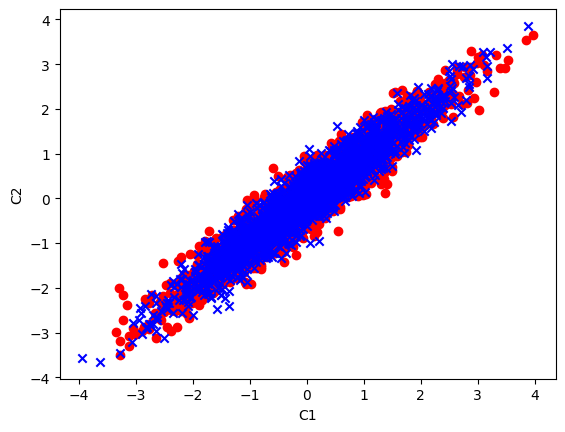

In [12]:
plt.xlabel('C1')
plt.ylabel('C2')
plt.scatter(df0['C1'], df0['C2'], color='red', label='-1',marker='o')
plt.scatter(df1['C1'], df1['C2'], color='blue', label='1',marker='x')

In [13]:
X=df.drop('Target', axis=1)
y=df['Target']
X.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,...,C461,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/01/2025 00:00,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,1.552290,1.437952,1.279354,1.069119,0.744547,0.277605,-0.300724,-0.937328,-1.520083,-1.951617,-2.136033,-2.040136,-1.722941,-1.261900,-0.804548,-0.461534,-0.278225,-0.251300,-0.301830,-0.313264,-0.204458,0.067002,0.471611,0.932651,1.353120,1.644498,1.758836,1.696134,1.482211,1.179769,...,1.297795,1.290419,1.135509,0.840443,0.453170,0.031299,-0.366744,-0.704964,-0.963146,-1.166004,-1.320913,-1.457381,-1.571719,-1.623356,-1.571719,-1.402057,-1.099614,-0.708652,-0.287077,0.103517,0.438416,0.689222,0.895768,1.113379,1.342055,1.570731,1.762524,1.839979,1.744082,1.489588,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
01/01/2025 00:01,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,-1.545709,-1.367893,-1.119998,-0.828548,-0.506228,-0.162588,0.185410,0.523795,0.822743,1.062119,1.212658,1.241355,1.155590,0.978726,0.751291,0.518479,0.326827,0.207952,0.170809,0.188096,0.237036,0.285012,0.296589,0.250279,0.131545,-0.054224,-0.281435,-0.524193,-0.764913,-0.968670,...,0.848206,0.926682,0.966194,0.965209,0.925171,0.851871,0.750836,0.635263,0.495169,0.327521,0.132563,-0.093737,-0.351475,-0.623371,-0.886077,-1.117509,-1.288357,-1.369218,-1.323061,-1.150471,-0.861634,-0.479214,-0.034418,0.409945,0.795128,1.071377,1.210040,1.189128,1.016435,0.727256,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
01/01/2025 00:02,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,-2.409010,-2.179321,-1.883556,-1.543741,-1.178754,-0.816914,-0.464514,-0.121238,0.202845,0.510881,0.787767,1.030043,1.218829,1.350979,1.410761,1.401322,1.328954,1.212536,1.074093,0.954528,0.869575,0.825525,0.825525,0.838110,0.819232,0.753157,0.617860,0.435367,0.237456,0.059242,...,0.633592,0.797207,0.938796,1.020603,0.989139,0.834964,0.567517,0.245951,-0.076558,-0.341803,-0.521149,-0.624982,-0.681618,-0.725668,-0.779157,-0.845232,-0.895575,-0.892429,-0.823207,-0.681618,-0.483392,-0.257478,-0.040374,0.134882,0.226129,0.254761,0.259481,0.260740,0.281821,0.332164,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
01/01/2025 00:03,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,-1.246560,-0.852660,-0.358617,0.165802,0.659512,1.073440,1.363857,1.524087,1.564144,1.504058,1.353842,1.120173,0.816404,0.482591,0.138764,-0.184367,-0.458761,-0.642358,-0.735826,-0.745840,-0.719135,-0.679078,-0.645696,-0.622330,-0.572258,-0.475452,-0.328574,-0.138635,0.043794,0.172145,...,-0.254134,-0.538876,-0.805927,-1.036258,-1.199826,-1.289955,-1.276603,-1.153092,-0.929437,-0.605639,-0.218750,0.165802,0.515972,0.796375,0.989986,1.106821,1.156893,1.170245,1.160231,1.123511,1.056749,0.929900,0.729612,0.442533,0.101043,-0.245455,-0.558905,-0.795912,-0.926099,-0.962819,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
01/01/2025 00:04,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,1.250755,1.056614,0.888359,0.684510,0.339371,-0.201420,-0.888032,-1.607432,-2.200641,-2.481067,-2.351639,-1.823144,-0.986181,-0.005014,0.905615,1.466467,1.585109,1.261541,0.624111,-0.190634,-0.951667,-1.434862,-1.510361,-1.143651,-0.449057,0.395456,1.175256,1.682179,1.790036,1.498824,...,0.129051,-0.110605,-0.266781,-0.303

In [14]:
y.head()

Timestamp
01/01/2025 00:00   -1
01/01/2025 00:01    1
01/01/2025 00:02   -1
01/01/2025 00:03   -1
01/01/2025 00:04   -1
Name: Target, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3936, 985, 3936, 985)

KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=450)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=450)

In [31]:
knn.score(X_test, y_test)

0.7380710659898477

Text(0.5, 1.0, 'Confusion Matrix')

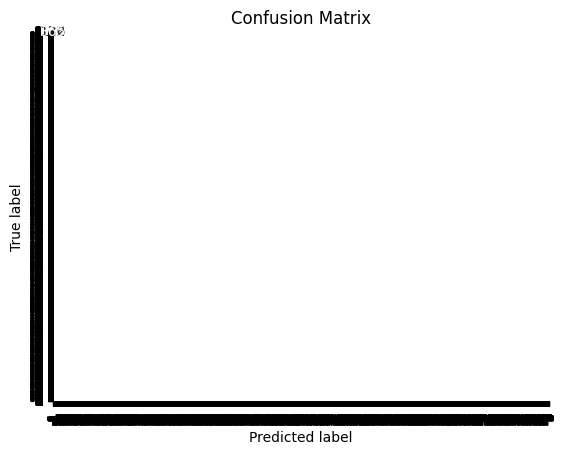

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Target'], cbar=False, yticklabels=df['Target'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

In [ ]:
print(classification_report(y_test, y_pred, target_names=df['Target'].unique().astype(str)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [27]:
k_values = [i for i in range (1,500)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

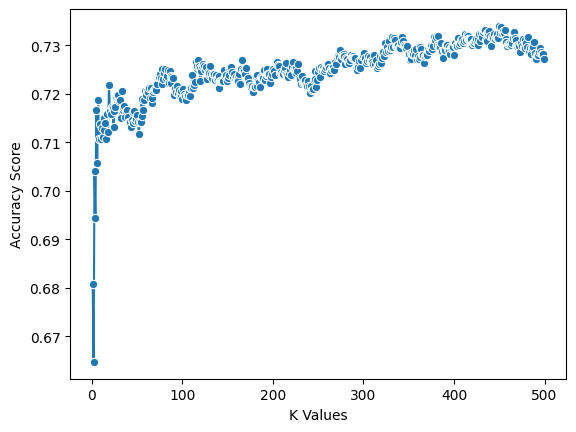

In [28]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [29]:
print("Best K Value: ", k_values[scores.index(max(scores))])

Best K Value:  450
